# **PERDIDOS EN EL ESPACIO**

Este proyecto consiste en localizar el planeta en el que se encuentra la nave.

## Importaciones necesarias

In [862]:
# Importación de las librerias
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
print("Setup complete")

Setup complete


## Primera toma de contacto con los planetas

### Creación de los planetas

Los planetas tienen características similares, mismas variables, pero con distintos datos. Por ello, sería óptimo la creación de clases poniendo como variable la gravedad y nombre de cada uno de ellos.

In [863]:
class Planeta:
    def __init__(self, nombre, g): #g: gravedad
        self.nombre = nombre
        self.g = g

planetas = {'Tierra': 9.8 , 'Marte': 3.7, 'Jupiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0} # Posibles planetas
planetas_list = [] # Planetas que se van a usar en la simulación

for i in range(len(planetas)):
    planetas[i] = Planeta(list(planetas.keys())[i], list(planetas.values())[i])
    planetas_list.append(planetas[i])


print("Planetas cargados")

Planetas cargados


Con los planetas ya generados se pasaría a la fase de la experimentación y descartar algunos planetas mediante los ejercicios 1 y 2. Aunque primero definimos las operaciones que se utilizarán para el cálculo del error y la gravedad.

### Cálculos

In [864]:
# Operación de la simulación
def simulacion(longitud, tiempo):
    # CALCULO DE LA GRAVEDAD
    g_calculado = (2 * longitud) / (tiempo**2)

    # CALCULO DEL ERROR
    L_error = 0.01 # VALOR YA DADO
    t_error = 0.01 # VALOR YA DADO
    dg_dL = 2 / tiempo**2 #Derivada parcial g respecto l
    dg_dt = -4 * longitud / tiempo**3 #Derivada parcial g respecto t
    g_error = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2) # Error de la gravedad
    return g_calculado, g_error

def planetas_esperados(g_calculado, g_error):
    # PLANETAS MAS PROBABLES
    planetas_probables = []
    for i in range(len(planetas_list)):
        if g_calculado - g_error <= planetas_list[i].g <= g_calculado + g_error:
            planetas_probables.append(planetas[i])
        else:
            pass
    return planetas_probables


Establecidad las operaciones. Se pasa a la fase de descarte de planetas.

In [865]:
experimento_a = simulacion(1, 0.46)
print("Experimento A")
print(f"- Gravedad calculada: {round(experimento_a[0],3)} \n- Error calculado: {round(experimento_a[1],3)} ")
experimento_b = simulacion(2, 0.66)
print('Experimento B')
print(f"- Gravedad calculada: {round(experimento_b[0],3)} \n- Error calculado: {round(experimento_b[1],3)} ")

Experimento A
- Gravedad calculada: 9.452 
- Error calculado: 0.422 
Experimento B
- Gravedad calculada: 9.183 
- Error calculado: 0.282 


In [880]:
experimento_a = planetas_esperados(experimento_a[0], experimento_a[1])

experimento_b = planetas_esperados(experimento_b[0], experimento_b[1])

if experimento_a == experimento_b:
    print("El planeta en el que se encuentra la nave se trata de ", experimento_a[0].nombre())
else:
    planetas_probables = []
    for i in range(len(experimento_a)):
        planetas_probables.append(experimento_a[i])
    for i in range(len(experimento_b)):
        planetas_probables.append(experimento_b[i])
    print("El planeta se puede encontrar en alguno de los siguientes planetas: ")
    for i in range(len(planetas_probables)):
        print('  -', planetas_probables[i].nombre)

El planeta se puede encontrar en alguno de los siguientes planetas: 
  - Tierra
  - Saturno


A continuación la lista se nos ha reducido a 3 posibles planetas por lo tanto comencemos dataset

## Creación del DataSet

TEXTO

### Creacion de distintos instantes de tiempo

In [866]:
df_recta = pd.DataFrame({'longitud': [0.46, 0.66], 'tiempo': [1,2]})
coefficients = np.polyfit(df_recta['tiempo'], df_recta['longitud'], 1) # polyfit(x, y, degree) sirve para calcular los coeficientes de la ecuación de la recta (y = mx + b)
m = coefficients[0]
b = coefficients[1]
fig = px.scatter(df_recta, x='tiempo', y='longitud')
fig.add_trace(px.line(x=df_recta['tiempo'], y=m*df_recta['tiempo'] + b).data[0])
fig.show()

In [867]:
# Generar valores de x equidistantes en el intervalo [0.46, 0.66]
x = np.linspace(0.46, 0.66, 100)

# Calcular los valores correspondientes de y a partir de la ecuación de la recta
y = 5*x - 1.3

# Crear una lista de diccionarios con los valores de x e y
data = []
for i in range(len(x)):
    data.append({'tiempo': x[i], 'longitud': y[i]})


df_recta = pd.DataFrame(data)
df_recta = df_recta.round(3)

In [868]:

df_recta.head()


,tiempo,longitud
0,0.460,1.00
1,0.462,1.01
2,0.464,1.02
3,0.466,1.03
4,0.468,1.04


In [869]:
df_recta.astype(float)
df_recta.dtypes

tiempo      float64
longitud    float64
dtype: object

### Cálculo de la gravedad

In [870]:
g_calculado = []
g_error = []
for i in range(100):
    g = simulacion(df_recta['longitud'][i], df_recta['tiempo'][i])
    g_calculado.append(g[0])
    g_error.append(g[1])
df_recta['g_calculado'] = g_calculado
df_recta['g_error'] = g_error

In [871]:
df_recta.head()

,tiempo,longitud,g_calculado,g_error
0,0.460,1.00,9.451796,0.421677
1,0.462,1.01,9.463841,0.420269
2,0.464,1.02,9.475327,0.418851
3,0.466,1.03,9.486268,0.417423
4,0.468,1.04,9.496676,0.415987


In [872]:
df_recta.to_csv('data/data_no_faker.csv')

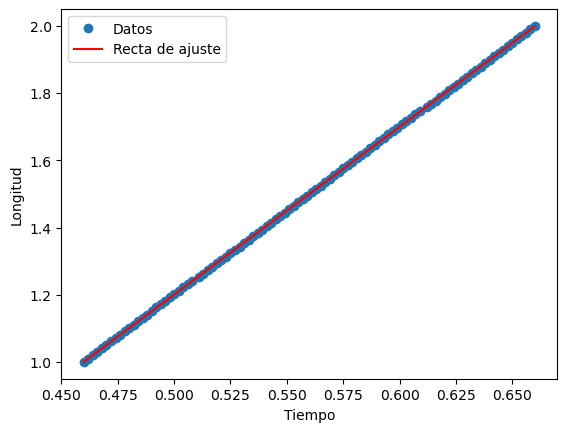

In [873]:

# Graficar los puntos del DataFrame
plt.plot(df_recta['tiempo'], df_recta['longitud'], 'o', label='Datos')

# Ajustar una línea recta a los datos y graficarla
a, b = np.polyfit(df_recta['tiempo'], df_recta['longitud'], 1)
plt.plot(df_recta['tiempo'], a * df_recta['tiempo'] + b, '-', label='Recta de ajuste', color='red')

# Etiquetar los ejes y agregar una leyenda
plt.xlabel('Tiempo')
plt.ylabel('Longitud')
plt.legend()

# Mostrar el gráfico
plt.show()

### Posible planeta

In [874]:
df_recta_1 = df_recta.copy()

In [875]:
planeta_pos = []
for i in range(100):
    planeta = planetas_esperados(df_recta_1['g_calculado'][i], df_recta_1['g_error'][i])
    if len(planeta) >= 1:
        for i in range(len(planeta)):
            planeta = planeta[i].nombre
    else:
        planeta = 'No se encontró planeta'
    planeta_pos.append(planeta)

df_recta_1['planeta'] = planeta_pos
df_recta_1['planeta'].astype(str)

0      Tierra
1      Tierra
2      Tierra
3      Tierra
4      Tierra
       ...   
95    Saturno
96    Saturno
97    Saturno
98    Saturno
99    Saturno
Name: planeta, Length: 100, dtype: object

In [876]:
df_recta_1.head(100)

,tiempo,longitud,g_calculado,g_error,planeta
0,0.460,1.00,9.451796,0.421677,Tierra
1,0.462,1.01,9.463841,0.420269,Tierra
2,0.464,1.02,9.475327,0.418851,Tierra
3,0.466,1.03,9.486268,0.417423,Tierra
4,0.468,1.04,9.496676,0.415987,Tierra
...,...,...,...,...,...
95,0.652,1.96,9.221273,0.286747,Saturno
96,0.654,1.97,9.211720,0.285558,Saturno
97,0.656,1.98,9.202112,0.284376,Saturno
98,0.658,1.99,9.192450,0.283199,Saturno


In [877]:
df_recta_1['planeta'] = df_recta_1['planeta'].replace('[]', None)

In [878]:
df_recta_1['planeta'].notnull()

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Name: planeta, Length: 100, dtype: bool

In [879]:
df_recta_1['planeta'].value_counts()


Tierra                    67
No se encontró planeta    20
Saturno                   13
Name: planeta, dtype: int64

## Conclusión